Saving spam.csv to spam.csv
NOORIN NASHIKA M | 24BAD084

Model Performance
Accuracy : 0.97847533632287
Precision: 0.9256756756756757
Recall   : 0.9133333333333333
F1 Score : 0.9194630872483222

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.93      0.91      0.92       150

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



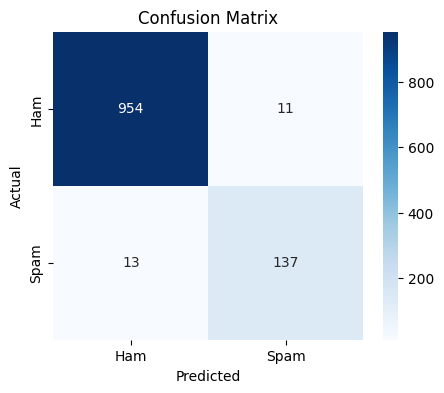

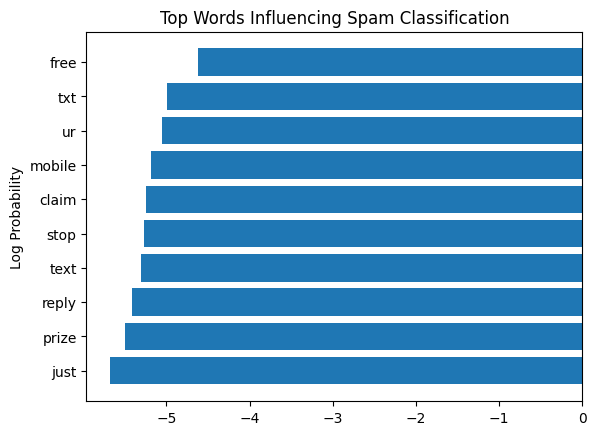

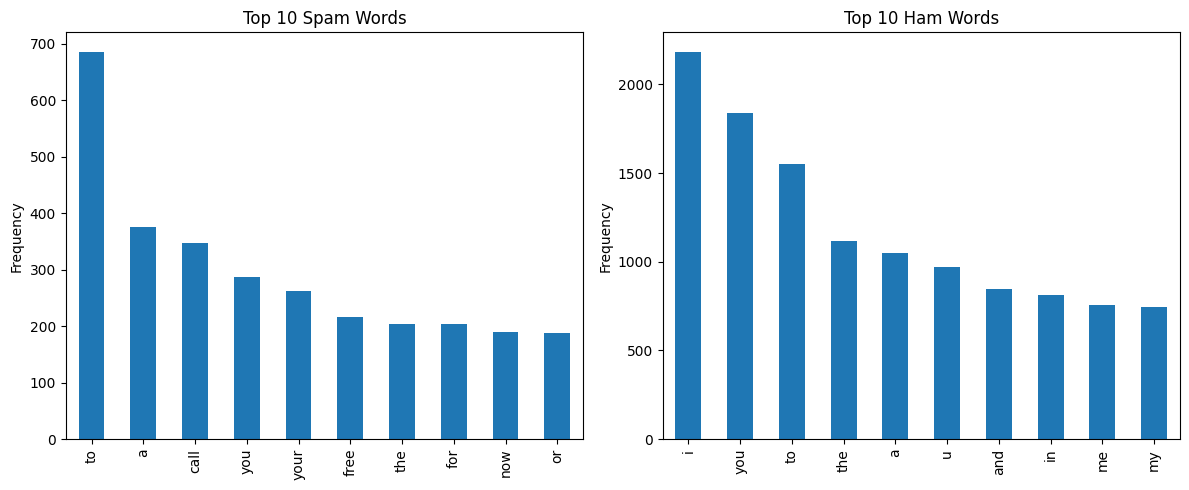

In [2]:
# EXPT NO: 4 – Multinomial Naive Bayes
#  NOORIN NASHIKA M
# Roll No: 24BAD084
from google.colab import files
uploaded = files.upload()
print("NOORIN NASHIKA M | 24BAD084")
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

# Loading Dataset
data = pd.read_csv("spam.csv", encoding='latin-1')
data = data[['v1','v2']]
data.columns = ['label','message']

# Text Cleaning
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

data['clean_message'] = data['message'].apply(clean_text)

# Converting Text to Numerical Features (Count Vectorizer)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['clean_message'])

# Encoding Labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['label'])  # spam=1, ham=0

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Training Model (Laplace Smoothing alpha=1)
model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
print("\nModel Performance")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

print("\nClassification Report\n")
print(classification_report(y_test, y_pred))

# VISUALIZATION 1 – CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham','Spam'],
            yticklabels=['Ham','Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# VISUALIZATION 2 – TOP WORDS INFLUENCING SPAM
feature_names = np.array(vectorizer.get_feature_names_out())
spam_log_probs = model.feature_log_prob_[1]

top_indices = np.argsort(spam_log_probs)[-10:]
top_words = feature_names[top_indices]
top_values = spam_log_probs[top_indices]

plt.figure()
plt.barh(top_words, top_values)
plt.title("Top Words Influencing Spam Classification")
plt.ylabel("Log Probability")
plt.show()


# VISUALIZATION 3 – WORD FREQUENCY (Spam vs Ham)
spam_messages = data[data['label']=='spam']['clean_message']
ham_messages = data[data['label']=='ham']['clean_message']

spam_words = ' '.join(spam_messages).split()
ham_words = ' '.join(ham_messages).split()

spam_freq = pd.Series(spam_words).value_counts().head(10)
ham_freq = pd.Series(ham_words).value_counts().head(10)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
spam_freq.plot(kind='bar')
plt.title("Top 10 Spam Words")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
ham_freq.plot(kind='bar')
plt.title("Top 10 Ham Words")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

